# Gerardo de Miguel González

# Binary Classification Proof of Concept

## Libraries

In [1]:
#::GMG::Which libraries are there?
list.files(R.home('library'))

[1] "base"         "boot"         "class"        "cluster"      "codetools"   
 [6] "compiler"     "datasets"     "foreign"      "graphics"     "grDevices"   
[11] "grid"         "KernSmooth"   "lattice"      "MASS"         "Matrix"      
[16] "methods"      "mgcv"         "nlme"         "nnet"         "parallel"    
[21] "rpart"        "spatial"      "splines"      "stats"        "stats4"      
[26] "survival"     "tcltk"        "tools"        "translations" "utils"

**::GMG::** Original `stdout`:

```shell
     'base' 'boot' 'class' 'cluster' 'codetools' 'compiler' 'datasets' 'foreign' 'graphics' 'grDevices' 'grid' 'KernSmooth' 'lattice' 'MASS' 'Matrix' 'methods' 'mgcv' 'nlme' 'nnet' 'parallel' 'rpart' 'spatial' 'splines' 'stats' 'stats4' 'survival' 'tcltk' 'tools' 'translations' 'utils' 
```

In [2]:
#::GMG::Helper function to install missing libraries before loading them
# https://stackoverflow.com/questions/4090169/elegant-way-to-check-for-missing-packages-and-install-them
using<-function(...) {
    libs<-unlist(list(...))
    req<-unlist(lapply(libs,require,character.only=TRUE))
    need<-libs[req==FALSE]
    if(length(need)>0){ 
        install.packages(need)
        lapply(need,require,character.only=TRUE)
    }
}

In [3]:
#::GMG::I'm going to use ... 
# ... mlbench for getting pima indians dataset ...
# https://cran.r-project.org/web/packages/mlbench/index.html
# https://cran.r-project.org/web/packages/mlbench/mlbench.pdf
# ... caTools for train/test splitting datasets ...
# https://cran.r-project.org/web/packages/caTools/index.html
# https://cran.r-project.org/web/packages/caTools/caTools.pdf
# ... correlation plot (corrplot) for EDA visualization ...
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# https://cran.r-project.org/web/packages/corrplot/index.html
using('mlbench', 'caTools', 'corrplot')

Loading required package: mlbench
Loading required package: caTools
Loading required package: corrplot
corrplot 0.84 loaded


## Dataset

### load

In [4]:
#::GMG::Where am I?
# http://rfunction.com/archives/1042
getwd()

[1] "/home/jovyan/work/tfm/pub"

In [5]:
#::GMG::What's it there?
list.files()

[1] "data"                                           
 [2] "LICENSE"                                        
 [3] "model"                                          
 [4] "poc-class-pima-indians-diabetes.ipynb"          
 [5] "poc-class-r-pima-indians-diabetes.ipynb"        
 [6] "poc-class-stratify-pima-indians-diabetes.ipynb" 
 [7] "poc-fs-embed-pima-indians-diabetes.ipynb"       
 [8] "poc-fs-filter-pima-indians-diabetes.ipynb"      
 [9] "poc-fs-wrapper-pima-indians-diabetes.ipynb"     
[10] "poc-model-selection-pima-indians-diabetes.ipynb"
[11] "README.md"

In [6]:
#::GMG::I've already downloaded from kaggle using my account the csv dataset
#       that is located in the data folder
# https://stat.ethz.ch/R-manual/R-devel/library/base/html/list.files.html
dir("data", pattern = "*.csv", full.names = TRUE, ignore.case = TRUE)

[1] "data/pima-indians-diabetes.csv"

In [7]:
#::GMG::Load the data into a data frame
pima <- read.csv('data/pima-indians-diabetes.csv')

In [8]:
head(pima)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [9]:
#::GMG::I try to get to know the R object
# https://swcarpentry.github.io/r-novice-inflammation/13-supp-data-structures/
#    class() - what kind of object is it (high-level)?
#    typeof() - what is the object’s data type (low-level)?
#    length() - how long is it? What about two dimensional objects?
#    attributes() - does it have any metadata?
# http://www.studytrails.com/r/core/r_print_format/
# http://www.studytrails.com/r/core/r_console_printing/
# https://www.rdocumentation.org/packages/R.utils/versions/2.8.0/topics/printf
# 
cat('pima class and type: ', class(pima), typeof(pima))

pima class and type:  data.frame list

In [10]:
#attributes(pima)

**::GMG::** Attributes:

```R
$names
   'Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI' 'DiabetesPedigreeFunction' 'Age' 'Outcome' 

$class
   'data.frame'

$row.names
   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41  ... 765 766 767 768
```

In [11]:
cat('pima shape (rows, cols): ', nrow(pima), ncol(pima))

pima shape (rows, cols):  768 9

In [12]:
cat('pima features: \n', 
    format(attributes(pima)$names, justify = "none"), 
    fill = 10
   )

pima features: 
 
Pregnancies 
Glucose 
BloodPressure 
SkinThickness 
Insulin 
BMI 
DiabetesPedigreeFunction 
Age 
Outcome


In [13]:
#::GMG::With mlbench there's an aalternative to get the pima indians diabetes dataset
# https://cran.r-project.org/web/packages/mlbench/mlbench.pdf
data(PimaIndiansDiabetes)

In [14]:
head(PimaIndiansDiabetes)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,pos
1,85,66,29,0,26.6,0.351,31,neg
8,183,64,0,0,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,0,0,25.6,0.201,30,neg


In [15]:
#::GMG::There are two versions in mlbench (!)
#::NOTE::What is the difference?
data(PimaIndiansDiabetes2)

In [16]:
head(PimaIndiansDiabetes2)

pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,NA,33.6,0.627,50,pos
1,85,66,29,NA,26.6,0.351,31,neg
8,183,64,NA,NA,23.3,0.672,32,pos
1,89,66,23,94,28.1,0.167,21,neg
0,137,40,35,168,43.1,2.288,33,pos
5,116,74,NA,NA,25.6,0.201,30,neg


### exploratory data analysis

In [17]:
#::GMG::Here I can see the variables (datasets and functions in memory)
ls()

[1] "pima"                 "PimaIndiansDiabetes"  "PimaIndiansDiabetes2"
[4] "using"

**::GMG::** This dataset consists of 768 observations of 9 variables: 8 variables which will be used as model predictors (number of times pregnant, plasma glucose concentration, diastolic blood pressure (mm Hg), triceps skin fold thickness (in mm), 2-hr serum insulin measure, body mass index, a diabetes pedigree function, and age) and 1 outcome variable (whether or not the patient has diabetes)

In [18]:
#::GMG::There are subtle differences between the kaggle and mlbench datasets
#       i.e. PimaIndiansDiabetes (say, v1) has the class as a factor (R compliant)
str(PimaIndiansDiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [19]:
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

**::GMG::** It's explained in the [mlbench documentation](https://cran.r-project.org/web/packages/mlbench/mlbench.pdf) (pp. 29):

> The data set `PimaIndiansDiabetes2` contains a corrected version of the original data set.  While the UCI repository index claims that there are no missing values, closer inspection of the data shows **several physical impossibilities**, e.g., blood pressure or body mass index of 0. In `PimaIndiansDiabetes2`, all *zero values* of glucose, pressure, triceps, insulin and mass have been **set to NA**.

In [20]:
#::GMG::PimaIndiansDiabetes2 (say, v2) has the outliers from 
#       glucose, pressure, triceps, insulin and mass as NAs
str(PimaIndiansDiabetes2)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 NA 70 96 ...
 $ triceps : num  35 29 NA 23 35 NA 32 NA 45 NA ...
 $ insulin : num  NA NA NA 94 168 NA 88 NA 543 NA ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 NA ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [21]:
#::GMG::NA counts yield the outliers (!)
summary(PimaIndiansDiabetes2)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   : 44.0   Min.   : 24.00   Min.   : 7.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 64.00   1st Qu.:22.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :29.00  
 Mean   : 3.845   Mean   :121.7   Mean   : 72.41   Mean   :29.15  
 3rd Qu.: 6.000   3rd Qu.:141.0   3rd Qu.: 80.00   3rd Qu.:36.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
                  NA's   :5       NA's   :35       NA's   :227    
    insulin            mass          pedigree           age        diabetes 
 Min.   : 14.00   Min.   :18.20   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.: 76.25   1st Qu.:27.50   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median :125.00   Median :32.30   Median :0.3725   Median :29.00            
 Mean   :155.55   Mean   :32.46   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:190.00   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 M

In [46]:
#::GMG::Check for missing values ... I know they are marked witn 'NA'
sapply(PimaIndiansDiabetes2, function(x) sum(is.na(x)))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        5       35      227      374       11        0        0 
diabetes 
       0

In [22]:
#::GMG::The kaggle version has different names for the features and class
#       Outcome is not a factor but a 'binary' integer type
#       Outliers (zeros in Glucose, BloodPressure, SkinThickness, Insulin and BMI) are kept
#       but not marked as NA
str(pima)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [23]:
summary(pima)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [47]:
#::GMG::Check for missing values
#::NOTE::There's no 'NA' marking in kaggle dataset so I know the result beforehand
#        and the fact that physical impossible values in some features are not taken 
#        into account (!)
sapply(pima, function(x) sum(is.na(x)))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

In [24]:
#::GMG::Counting 'Outliers' a.k.a "physical impossibilities" (Zeros)
# https://stackoverflow.com/questions/22286957/count-the-number-of-non-zero-elements-of-each-column
apply(X = pima[c("Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI")], 
      MARGIN = 2, 
      FUN = function(c) sum(c == 0))

Glucose BloodPressure SkinThickness       Insulin           BMI 
            5            35           227           374            11

In [25]:
#::GMG::What do I do with the outliers?
#       Glucose, Insulin, BloodPressure, SkinThickness, and BMI 
#       Options: remove, impute, leave them untouched (lto)
#       Chosen: remove (Glucose, BloodPressure, BMI) + lto (SkinThickness, Insulin)
# https://stackoverflow.com/questions/9977686/how-to-remove-rows-with-a-zero-value-in-r
#::NOTE::I cannot remove the outliers from SkinThickness and Insuline 
#        because they're a big slice of the dataset (!)
row_sub <- apply(
             X = pima[c("Glucose", "BloodPressure", "BMI")], 
             MARGIN = 1, 
             FUN = function(row) all(row != 0)
)

***::NOTE::** I've [searched](https://www.google.com/search?client=firefox-b-d&q=a+person+can+have+zero+insulin%3F) about this *zero insulin issue*. So [it turns out](https://www.yourhormones.info/hormones/insulin/) that:

> People with type 1 diabetes produce very little or no insulin at all. This condition is caused when the beta cells that make insulin have been destroyed by antibodies (these are usually substances released by the body to fight against infections), hence they are unable to produce insulin.

So it remains only the `SkinThickness` zero physical impossibility *unresolved* and left it be.

In [26]:
#::GMG::I remove some of the outliers
pima_mod <- pima[row_sub,]

In [27]:
#::GMG::The somewhat cleaned dataset ...
str(pima_mod)

'data.frame':	724 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 2 4 10 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 197 110 168 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 70 92 74 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 45 0 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 543 0 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 30.5 37.6 38 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 53 30 34 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 1 0 1 ...


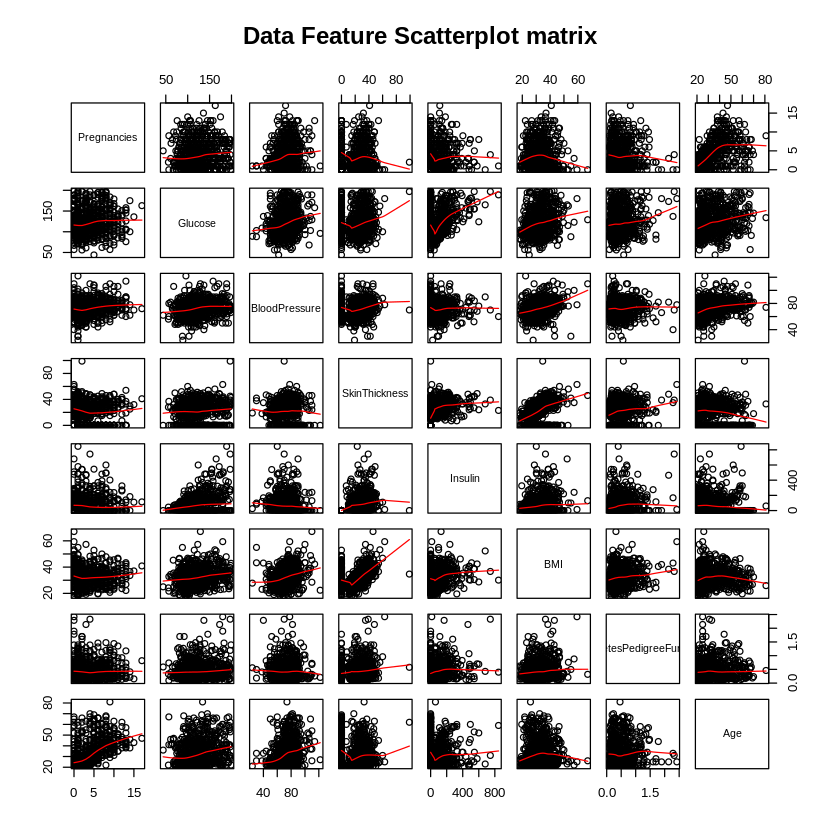

In [48]:
#::GMG::pair plot to see correlations between pairs of features
#::NOTE::See also:
# https://www.statmethods.net/advgraphs/trellis.html
# https://www.statmethods.net/graphs/scatterplot.html
# https://www.statmethods.net/advgraphs/layout.html
# https://www.r-bloggers.com/scatterplot-matrices-pair-plots-with-cdata-and-ggplot2/
pairs(pima_mod[1:8], 
      pch = 21, 
      main = 'Data Feature Scatterplot matrix', 
      panel = panel.smooth
     )

In [29]:
#::GMG::Another way to see correlations with corrplot
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
# https://stat.ethz.ch/R-manual/R-devel/library/stats/html/cor.html
# https://www.statmethods.net/stats/correlations.html
#::NOTE::Se also https://www.statmethods.net/advgraphs/correlograms.html
M <- cor(pima_mod)

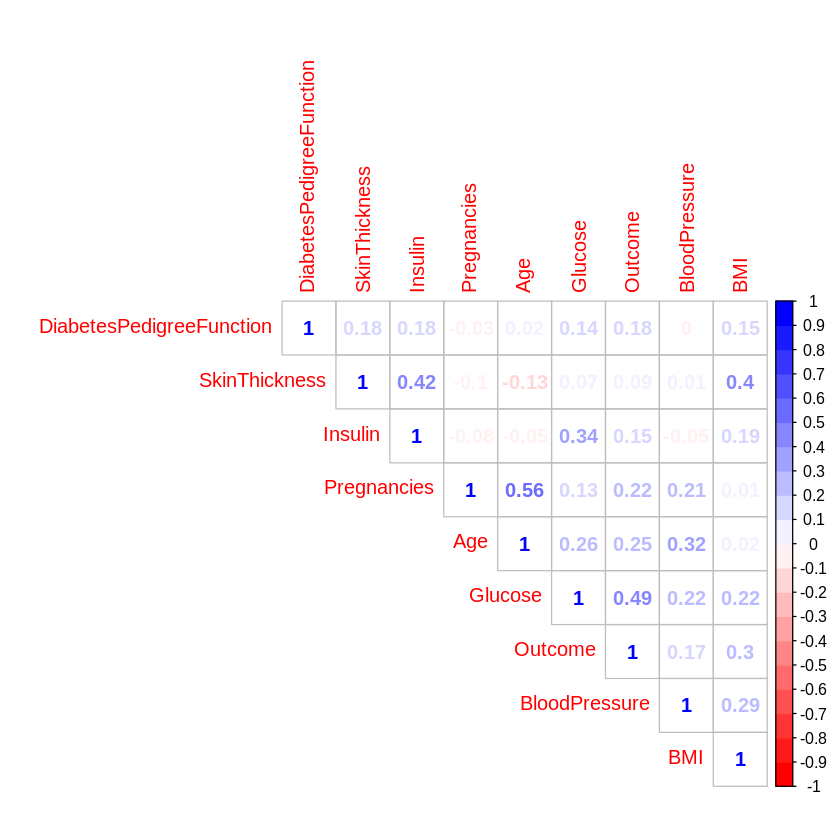

In [30]:
#::GMG::Plpot correlation plot
# http://www.sthda.com/english/wiki/visualize-correlation-matrix-using-correlogram
col<- colorRampPalette(c("red", "white", "blue"))(20)
corrplot(M, method="number", type="upper", order="hclust", col = col)

In [31]:
#::GMG::Variables created so far :)
ls()

[1] "col"                  "M"                    "pima"                
[4] "pima_mod"             "PimaIndiansDiabetes"  "PimaIndiansDiabetes2"
[7] "row_sub"              "using"

In [32]:
#::GMG::I change the Outcome variable into a 2 factor
# https://swcarpentry.github.io/r-novice-inflammation/12-supp-factors/
# https://www.stat.berkeley.edu/~s133/factors.html
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
pima_mod$Outcome <- as.factor(x = pima_mod$Outcome)
levels(pima_mod$Outcome) <- c('healthy', 'diabetes')

In [33]:
str(pima_mod)

'data.frame':	724 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 2 4 10 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 197 110 168 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 70 92 74 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 45 0 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 543 0 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 30.5 37.6 38 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 53 30 34 ...
 $ Outcome                 : Factor w/ 2 levels "healthy","diabetes": 2 1 2 1 2 1 2 2 1 2 ...


In [34]:
#::GMG::Now I test the imbalance of the dataset
# http://metadatascience.com/2013/07/03/plotting-the-frequency-distribution-using-r/
table(pima_mod$Outcome)


 healthy diabetes 
     475      249 

In [35]:
prop.table(table(pima_mod$Outcome))


  healthy  diabetes 
0.6560773 0.3439227 

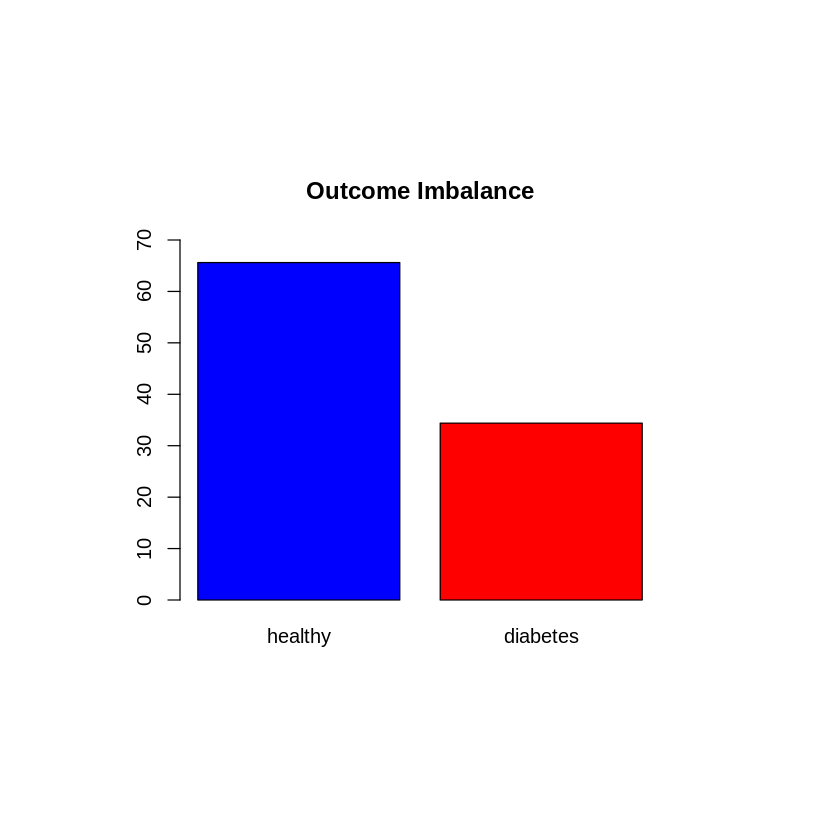

In [36]:
#::GMG::Plot the imbalance
# https://www.statmethods.net/advgraphs/parameters.html
# http://www.programmingr.com/content/positioning-charts-fig-and-fin/
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
par(pin = c(4,3))
barplot(100*prop.table(table(pima_mod$Outcome)), 
        col = c('blue', 'red'),
        ylim = c(0,70),
        main = 'Outcome Imbalance')

## Train/Test Split

In [37]:
#::GMG::Let's make it reproducible
set.seed(1)

In [38]:
#::GMG::I do the customary train/test split BUT stratifiying (?) because of the imbalance
#       to make sure the percentages of healthy/diabetes hold in the train and test sets
#::NOTE::caTools has sample.split( Y, SplitRatio = 2/3, group = NULL )
# https://www.rdocumentation.org/packages/caTools/versions/1.17.1/topics/sample.split
# https://cran.r-project.org/web/packages/caTools/caTools.pdf
# Split data from vector Y into two sets in predefined ratio while preserving relative ratios of 
# differentlabels in Y. Used to split the data used during classification into train and test subsets.
#::NOTE::So it seems this does whay I want it to do ...
msk <- sample.split(Y = pima_mod$Outcome, SplitRatio = 0.7)

In [39]:
pima_train <- pima_mod[msk,]  # use output of sample.split to ...
pima_test  <- pima_mod[!msk,] # create train and test subse

In [40]:
str(pima_train)

'data.frame':	506 obs. of  9 variables:
 $ Pregnancies             : int  6 8 0 2 4 10 5 0 7 1 ...
 $ Glucose                 : int  148 183 137 197 110 139 166 118 107 103 ...
 $ BloodPressure           : int  72 64 40 70 92 80 72 84 74 30 ...
 $ SkinThickness           : int  35 0 35 45 0 0 19 47 0 38 ...
 $ Insulin                 : int  0 0 168 543 0 0 175 230 0 83 ...
 $ BMI                     : num  33.6 23.3 43.1 30.5 37.6 27.1 25.8 45.8 29.6 43.3 ...
 $ DiabetesPedigreeFunction: num  0.627 0.672 2.288 0.158 0.191 ...
 $ Age                     : int  50 32 33 53 30 57 51 31 31 33 ...
 $ Outcome                 : Factor w/ 2 levels "healthy","diabetes": 2 2 2 2 1 1 2 2 2 1 ...


In [41]:
prop.table(table(pima_train$Outcome))


  healthy  diabetes 
0.6561265 0.3438735 

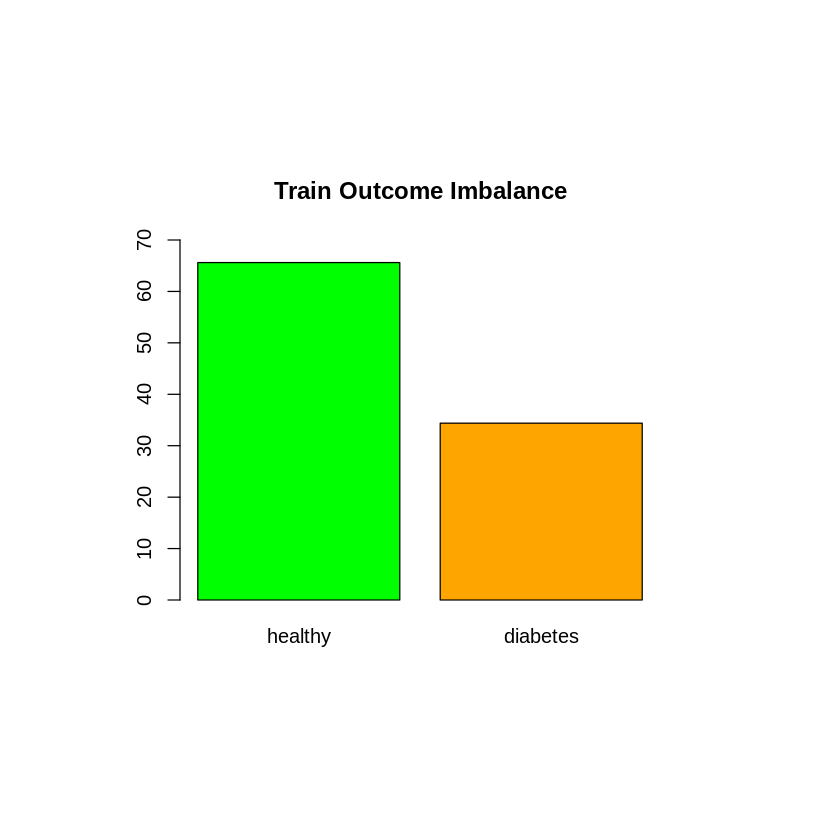

In [42]:
#::GMG::Plot the imbalance, see wether percentage is kept
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
par(pin = c(4,3))
barplot(100*prop.table(table(pima_train$Outcome)), 
        col = c('green', 'orange'),
        ylim = c(0,70),
        main = 'Train Outcome Imbalance')

In [43]:
str(pima_test)

'data.frame':	218 obs. of  9 variables:
 $ Pregnancies             : int  1 1 5 3 10 1 10 5 3 10 ...
 $ Glucose                 : int  85 89 116 78 168 189 125 117 158 122 ...
 $ BloodPressure           : int  66 66 74 50 74 60 70 92 76 78 ...
 $ SkinThickness           : int  29 23 0 32 0 23 26 0 36 31 ...
 $ Insulin                 : int  0 94 0 88 0 846 115 0 245 0 ...
 $ BMI                     : num  26.6 28.1 25.6 31 38 30.1 31.1 34.1 31.6 27.6 ...
 $ DiabetesPedigreeFunction: num  0.351 0.167 0.201 0.248 0.537 0.398 0.205 0.337 0.851 0.512 ...
 $ Age                     : int  31 21 30 26 34 59 41 38 28 45 ...
 $ Outcome                 : Factor w/ 2 levels "healthy","diabetes": 1 1 1 2 2 2 2 1 2 1 ...


In [44]:
prop.table(table(pima_test$Outcome))


  healthy  diabetes 
0.6559633 0.3440367 

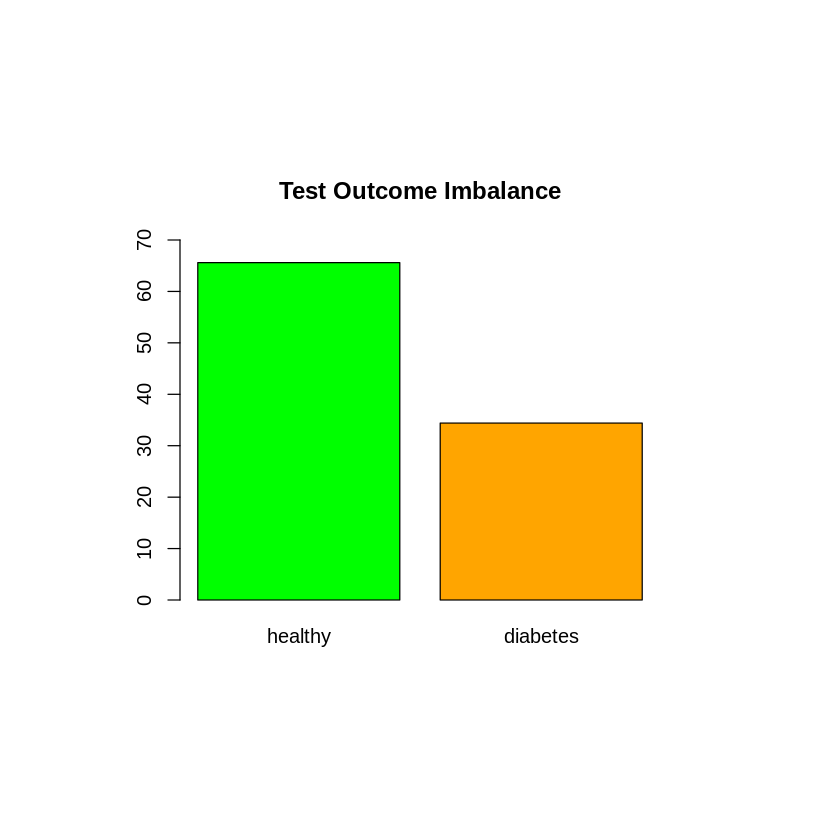

In [45]:
#::GMG::Plot the imbalance, see wether percentage is kept
#::NOTE::I don't know how to make the fig smaller and the margins tight (!?)
par(pin = c(4,3))
barplot(100*prop.table(table(pima_test$Outcome)), 
        col = c('green', 'orange'),
        ylim = c(0,70),
        main = 'Test Outcome Imbalance')

## logistic regression (logit)

### fit and predict

In [49]:
#::GMG::Training The Model
# https://www.statmethods.net/advstats/glm.html
fit_pima <- glm(Outcome ~., 
                data = pima_train, 
                family = binomial(link = 'logit'))

In [50]:
#::GMG::Model results
summary(fit_pima)


Call:
glm(formula = Outcome ~ ., family = binomial(link = "logit"), 
    data = pima_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3973  -0.7262  -0.4233   0.7181   2.1822  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.443753   0.951340  -8.876  < 2e-16 ***
Pregnancies               0.118361   0.038937   3.040  0.00237 ** 
Glucose                   0.036429   0.004530   8.041 8.93e-16 ***
BloodPressure            -0.011207   0.009749  -1.149  0.25035    
SkinThickness             0.004841   0.008393   0.577  0.56413    
Insulin                  -0.001395   0.001062  -1.314  0.18894    
BMI                       0.082632   0.019409   4.258 2.07e-05 ***
DiabetesPedigreeFunction  0.646150   0.353523   1.828  0.06759 .  
Age                       0.013788   0.011513   1.198  0.23104    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial famil

**::GMG::** The result shows that the variables `BloodPressure`, `SkinThickness`, `Insulin`, `Diabetes PedigreeFunction` and `Age` are *not statiscally significant*. In other words, the *p_values is greather than 0.05*. Therefore they will be removed.

In [57]:
fit_pima2 <- update(
    fit_pima, ~. - BloodPressure - SkinThickness - Insulin  - Age 
)

In [58]:
summary(fit_pima2)


Call:
glm(formula = Outcome ~ Pregnancies + Glucose + BMI + DiabetesPedigreeFunction, 
    family = binomial(link = "logit"), data = pima_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5359  -0.7300  -0.4197   0.7192   2.1482  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.441249   0.818037 -10.319  < 2e-16 ***
Pregnancies               0.138123   0.033293   4.149 3.34e-05 ***
Glucose                   0.034875   0.004062   8.585  < 2e-16 ***
BMI                       0.075587   0.017175   4.401 1.08e-05 ***
DiabetesPedigreeFunction  0.609202   0.346186   1.760   0.0784 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 651.29  on 505  degrees of freedom
Residual deviance: 484.03  on 501  degrees of freedom
AIC: 494.03

Number of Fisher Scoring iterations: 4


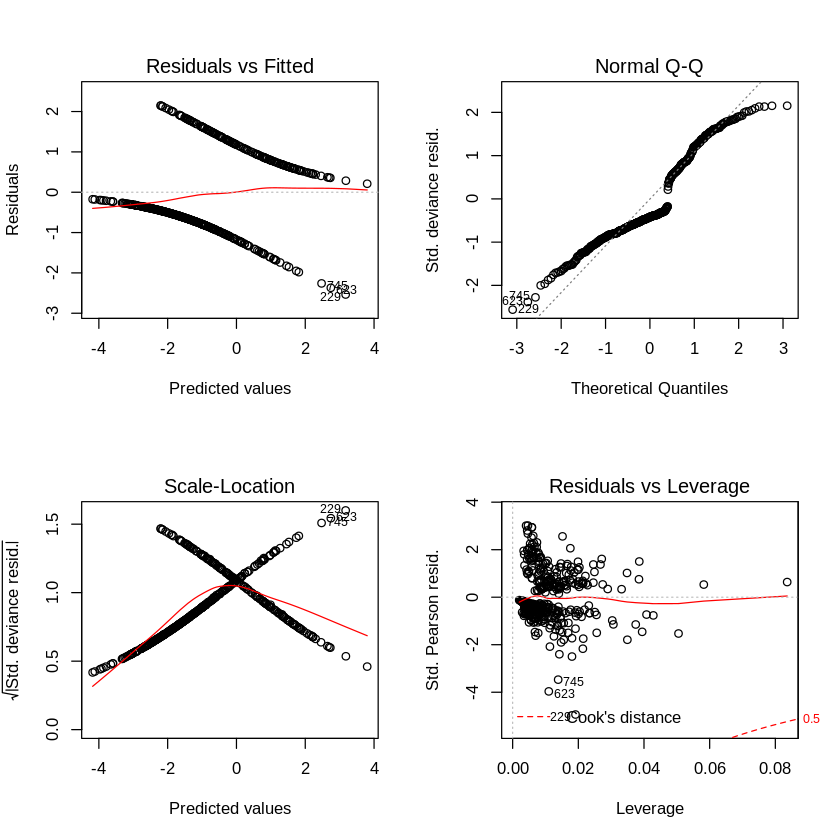

In [59]:
par(mfrow = c(2,2))
plot(fit_pima2)

In [60]:
#::GMG::95% CI for the coefficients
confint(fit_pima2) 

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-10.11487956,-6.90148579
Pregnancies,0.07359045,0.20439387
Glucose,0.02716364,0.04312258
BMI,0.04259290,0.11009657
DiabetesPedigreeFunction,-0.05983122,1.30026476


In [156]:
#::GMG:: predicted values as probabilities (not yet classes)
prob <- predict(fit_pima2, newdata = pima_test, type="response") 

In [202]:
str(prob)

 Named num [1:218] 0.0425 0.0486 0.1614 0.0567 0.8806 ...
 - attr(*, "names")= chr [1:218] "2" "4" "6" "7" ...


In [150]:
#::GMG:: predicted classes with 0.5 prob cutoff value (that may not be the optimal (?))
pima_pred <- ifelse(test = prob > 0.5, yes = 1, no = 0)

In [125]:
pima_pred <- as.factor(pima_pred)
levels(pima_pred) <- c('healthy', 'diabetes')
str(pima_pred)

 Factor w/ 2 levels "healthy","diabetes": 1 1 1 1 2 2 1 1 2 1 ...
 - attr(*, "names")= chr [1:218] "2" "4" "6" "7" ...


### evaluation

In [142]:
#::GMG::Confusion Matrix AND metrics
# cm <- table(Predicted = pima_pred, Actual = pima_test$Outcome)
# https://www.rdocumentation.org/packages/base/versions/3.6.1/topics/table
# https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
# https://stackoverflow.com/questions/33621592/sum-of-antidiagonal-of-a-matrix
# https://stackoverflow.com/questions/14577412/how-to-convert-variable-object-name-into-string
confusion_matrix <- function (true, pred, beta = 1) {
    t <- table(true, pred)
    p <- t[2,2]/sum(t[,2])
    r <- t[2,2]/sum(t[2,])
    s <- t[1,1]/sum(t[1,])
    list(cm = t,
         accuracy = sum(diag(t))/sum(t), 
         #error_rate = sum(diag(t[nrow(t):1,]))/sum(t),
         precision = p, 
         recall = r, #::NOTE::it's also called sensitivity
         f1 = (1 + beta^2) * p * r/((beta^2 * p) + r),
         specificity = s,
         prevalence = sum(t[2,])/sum(t),
         balanced_accuracy = (r + s) / 2
        )
}

In [151]:
#::GMG::Get confusion matrix and metrics
cf <- confusion_matrix(true = pima_test$Outcome, pred = pima_pred)

In [152]:
#::GMG::Print 'raw' confusion matrix
cf$cm

          pred
true         0   1
  healthy  131  12
  diabetes  33  42

In [153]:
#::GMG::Mterics
# https://stackoverflow.com/questions/3443687/formatting-decimal-places-in-r
cat(sep='', "Accuracy: ", format(round(cf$accuracy, 2), nsmall = 2), 
    ", Balanced Accuracy ", format(round(cf$balanced_accuracy, 2), nsmall = 2))

Accuracy: 0.79, Balanced Accuracy 0.74

In [154]:
cat(sep = '', "Precision: ", format(round(cf$precision, 2), nsmall = 2), 
    ", Recall: ", format(round(cf$recall, 2), nsmall = 2),
    ", Fl: ", format(round(cf$f1, 2), nsmall = 2)
   )

Precision: 0.78, Recall: 0.56, Fl: 0.65

In [179]:
cat(sep='', "Specificity: ", format(round(cf$specificity, 2), nsmall = 2), 
    ", Sensitivity ", format(round(cf$recall, 2), nsmall = 2))

Specificity: 0.92, Sensitivity 0.56

In [181]:
# https://cran.r-project.org/web/packages/PRROC/index.html
using('PRROC')

Loading required package: PRROC
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘PRROC’”Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
Loading required package: PRROC


[[1]]
[1] TRUE

**::GMG::** First time run (instalation) 

```R
Loading required package: PRROC

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :

“there is no package called ‘PRROC’”Installing package into ‘/home/jovyan/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Loading required package: PRROC

    TRUE
```

In [272]:
#::GMG::Precision Recall Curve and PR AUC
# https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0092209
# https://stats.stackexchange.com/questions/10501/calculating-aupr-in-r
#::NOTE::scores.class0 - the classification scores of all data points
#        scores.class1 should not be assigned an explicit value, but left
#        at the default (scores.class1=scores.class0). In addition, weights.class0 needs to
#        contain the class labels of the data points (1 for positive class, 0 for negative
#        class) or **the soft-labels for the positive class, i.e., the probability for each data
#        point to belong to the positive class**. Accordingly, weights.class1 should be left
#        at the default value (1-weights.class0).
# ** This DOES NOT work for me! 8-()
# If weights.class0 = prob(pima_test$Outcome == "diabetes") ... Is this soft-labels?
# then **Error in if (sum(weights < 0) != 0) {: missing value where TRUE/FALSE needed**
pr_1 <- pr.curve(scores.class0 = prob,
                 weights.class0 = pima_test$Outcome == "diabetes",
                 min.compute = T, 
                 max.compute = T,
                 rand.compute = T,
                 curve = T)

In [273]:
print(pr_1)


  Precision-recall curve

    Area under curve (Integral):
     0.7734331 

    Relative area under curve (Integral):
     0.7181818 

    Area under curve (Davis & Goadrich):
     0.7734053 

    Relative area under curves (Davis & Goadrich):
     0.7181487 

    Curve for scores from  0.01255039  to  0.949035 
    ( can be plotted with plot(x) )



    Maximum AUC:
     1   1 


    Minimum AUC:
     0.1960532   0.1960487 


    AUC of a random classifier:
     0.3440367   0.3440367 


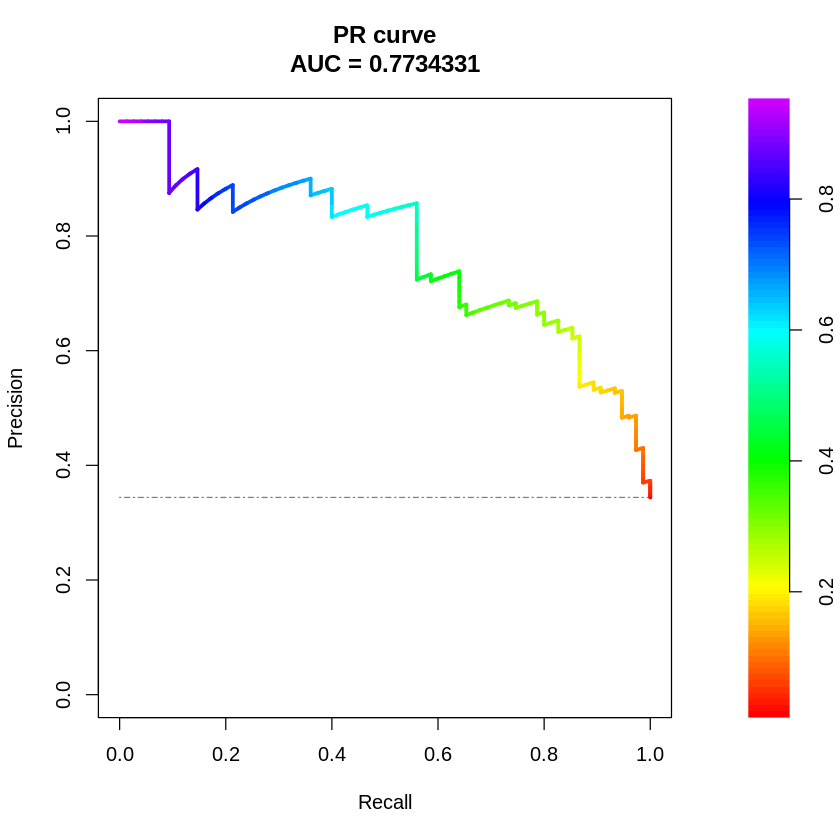

In [274]:
plot(pr_1, rand.plot = T)

In [275]:
#::GMG::Weights computations? I'm not sure ... It doesn't work properly
#       See ::NOTE in pr.curve cell (!)
weights <- ifelse(pima_test$Outcome == "healthy",
                        0.5*length(pima_test$Outcome)/table(pima_test$Outcome)[1] ,
                        0.5*length(pima_test$Outcome)/table(pima_test$Outcome)[2]
                 )

In [276]:
str(weights)

 num [1:218] 0.762 0.762 0.762 1.453 1.453 ...


In [278]:
#::GMG:: scores.class0 - the classification scores of only the data points belonging to the positive class.
#        the scores for the negative data points need to be provided in scores.class1. 
#        In this case, weights.class0 and weights.class1 need to be provided only for soft-labelling and 
#        should be of **the same length** as scores.class0 and scores.class1, respectively.
#
#        **so they are! BUT ...
pr_2 <- pr.curve(scores.class0 = prob[pima_test$Outcome == "diabetes"], #::GMG::'Positive' class
                 scores.class1 = prob[pima_test$Outcome == "healthy"], 
                 #::NOTE::If I try the weights it yields a warning message:
                 #
                 # Warning message in weights.class0 + weights.class1:
                 # “longer object length is not a multiple of shorter object length”
                 #
                 weights.class0 = weights[pima_test$Outcome == "diabetes"],
                 weights.class1 = weights[pima_test$Outcome == "healthy"],
                 min.compute = F, 
                 max.compute = F,
                 rand.compute = T,
                 curve = T)

Warning message in weights.class0 + weights.class1:
“longer object length is not a multiple of shorter object length”

In [279]:
print(pr_2)


  Precision-recall curve

    Area under curve (Integral):
     0.858406 

    Area under curve (Davis & Goadrich):
    cannot be computed for weighted data

    Curve for scores from  0.01255039  to  0.949035 
    ( can be plotted with plot(x) )



    AUC of a random classifier:
     0.3440367   0.3440367 


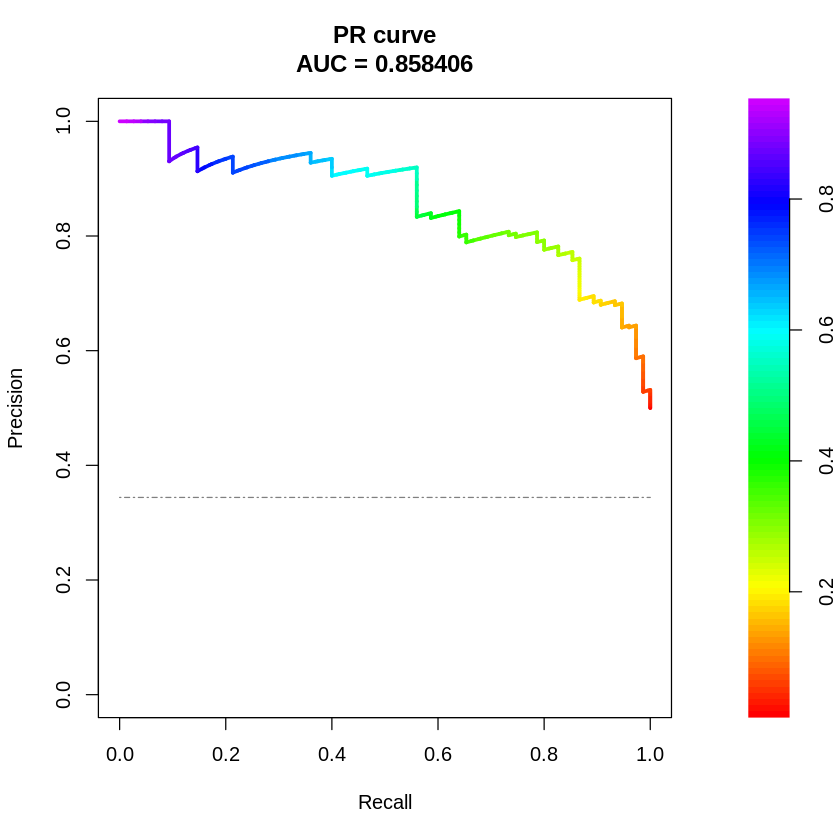

In [280]:
plot(pr_2, rand.plot = T)